In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
base_dir = '/content/drive/MyDrive/simulation_reports/'

In [ ]:
results = {}

In [ ]:
for filename in os.listdir(base_dir):
  df = pd.read_csv(os.path.join(base_dir, filename))
  nDays = max(df['day'])+1
  for n in range(nDays):
    df2 = df[df['day'] == n]
    eted = (df2['average_eted'] * df2['pkt_received']).sum() / df2['pkt_received'].sum()
    delay = df2.apply(lambda row: row['total_delay'] / row['pkt_received'] if row['pkt_received'] > 0 else 0, axis=1).mean()
    if filename not in results:
      results[filename] = {'eted':[eted], 'total':[delay]}
    else:
      results[filename]['eted'].append(eted)
      results[filename]['total'].append(delay)



In [ ]:
print(results)

{'no_priority.csv': {'eted': [0.1347653014833609, 0.09105174224628743, 0.11875329888725683, 0.058409265623303716, 0.07764586656696253, 0.10183214036600086, 0.09182077173095918, 0.06951780118775651, 0.055393211401013366, 0.05222396041510508, 0.04737706048207326, 0.06927558178850732, 0.07554381498064154, 0.07484497286915388, 0.13781127131017015, 0.0410893409509729, 0.031675500149675614, 0.027515656878956275, 0.09710880180264031, 0.057298376750008866, 0.03581553305696924, 0.04359412081250742, 0.02988283276994487, 0.044536910542809637, 0.013745978451192136, 0.04068737225277926, 0.03694571556314793, 0.06884837562097582, 0.03833563266158441, 0.04319750359408077, 0.03233035877616819, 0.020823853289182622, 0.055120327337980446, 0.0385520150572435, 0.061903820454681645, 0.03864966759771994, 0.05109510594281965, 0.029005083903605455, 0.019786071675022377, 0.027143937856336498, 0.024768719175911107, 0.03043886630341151, 0.04527307284989039, 0.07432752502230702, 0.02380601430729624, 0.035274079065

In [ ]:
legend_labels={'no_priority.csv':'Control Group', 'grenmf.csv':'GrENMF', 'crenmf.csv':'CrENMF', 'spectral.csv':'Spectral Clustering'}

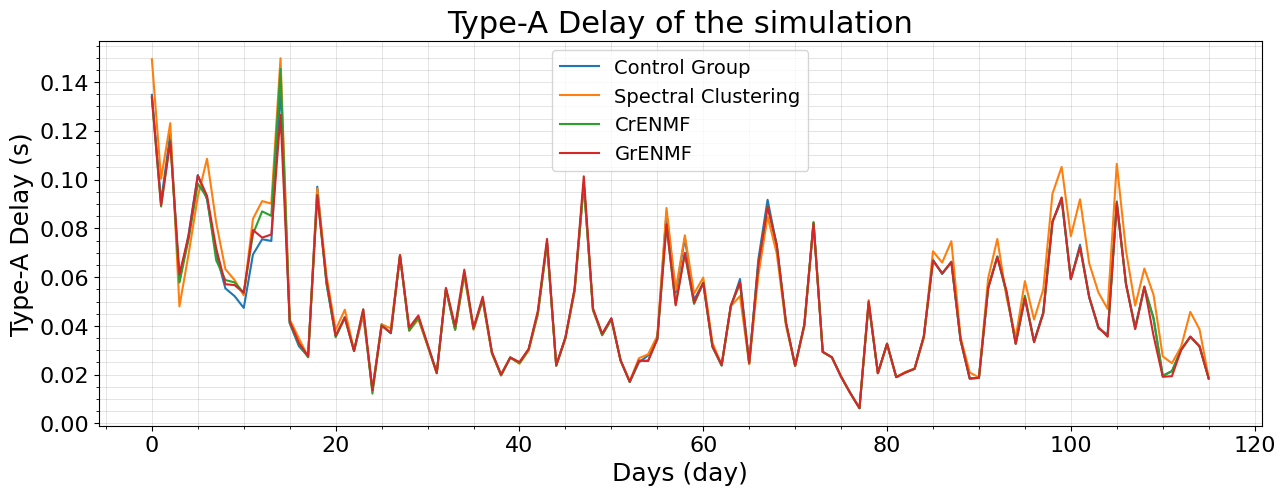

In [ ]:
plt.figure(figsize=(15,5))
for key in results:
  plt.plot(results[key]['eted'], label=legend_labels[key])
plt.xlabel('Days (day)', fontsize=18)
plt.ylabel('Type-A Delay (s)', fontsize=18)
plt.title('Type-A Delay of the simulation', fontsize=22)
plt.tick_params(axis='both', labelsize=16)
plt.legend(fontsize=14)
plt.grid(True, which='both', color='grey', linestyle='-', linewidth=0.5, alpha=0.3)
plt.minorticks_on()
plt.show()

In [ ]:
legend_labels={'no_priority.csv':'Control\nGroup', 'grenmf.csv':'GrENMF', 'crenmf.csv':'CrENMF', 'spectral.csv':'Spectral\nClustering'}

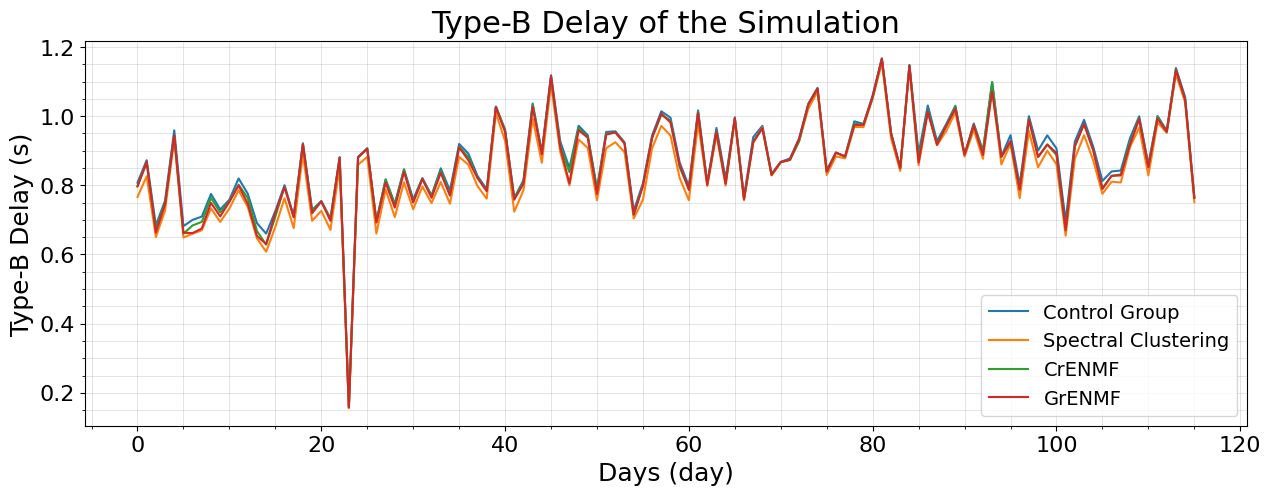

In [ ]:
plt.figure(figsize=(15,5))
for key in results:
  plt.plot(results[key]['total'], label=legend_labels[key])
plt.xlabel('Days (day)', fontsize=18)
plt.ylabel('Type-B Delay (s)', fontsize=18)
plt.title('Type-B Delay of the Simulation', fontsize=22)
plt.tick_params(axis='both', labelsize=16)
plt.legend(fontsize=14)
plt.grid(True, which='both', color='grey', linestyle='-', linewidth=0.5, alpha=0.3)
plt.minorticks_on()
plt.show()

In [ ]:
for filename in os.listdir(base_dir):
  if not filename.endswith('csv'):
    continue
  df = pd.read_csv(os.path.join(base_dir, filename))
  results[filename]['average_eted'] = (df['average_eted'] * df['pkt_received']).sum() / df['pkt_received'].sum()
  results[filename]['average_total'] = df.apply(lambda row: row['total_delay'] / row['pkt_received'] if row['pkt_received'] > 0 else 0, axis=1).mean()
  print(filename)
  print(eted)
  print(delay)
filename = base_dir + 'final_results.json'
with open(filename, 'w') as file:
  json.dump(results, file, indent=4)



no_priority.csv
0.05229015531438324
0.8663540384480526
spectral.csv
0.05229015531438324
0.8663540384480526
crenmf.csv
0.05229015531438324
0.8663540384480526
grenmf.csv
0.05229015531438324
0.8663540384480526


In [ ]:


plt.bar(index, group2, bar_width, label='Group 2', color='orange', edgecolor='grey')
plt.bar(index + bar_width, group3, bar_width, label='Group 3', color='green', edgecolor='grey')


[0 1 2 3]


In [3]:
with open(base_dir+"final_results.json", 'r') as file:
  results = json.load(file)

In [4]:
print(np.argmin(results['no_priority.csv']['eted']))
print(np.argmin(results['grenmf.csv']['eted']))
print(np.argmin(results['crenmf.csv']['eted']))
print(np.argmin(results['spectral.csv']['eted']))

77
77
77
77


In [5]:
print(np.argmin(results['no_priority.csv']['total']))
print(np.argmin(results['grenmf.csv']['total']))
print(np.argmin(results['crenmf.csv']['total']))
print(np.argmin(results['spectral.csv']['total']))

23
23
23
23


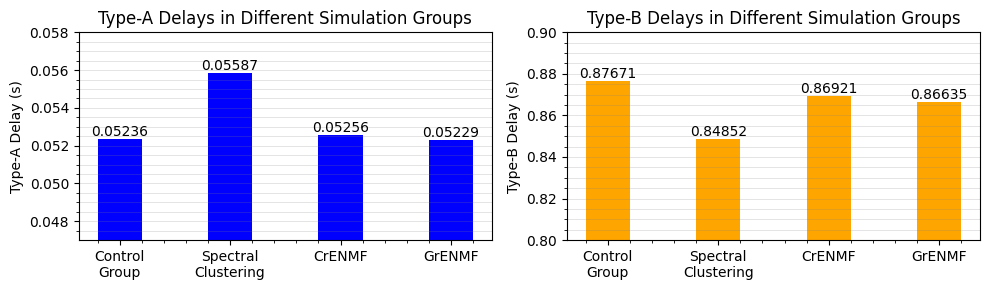

In [ ]:
fig = plt.figure(figsize=(10,3))
bar_width = 0.4
data = [(legend_labels[x], results[x]['average_eted'], results[x]['average_total']) for x in results]
ax_A = fig.add_subplot(1,2,1)
barA = ax_A.bar([k[0] for k in data], [k[1] for k in data], bar_width, label='Type-A Delay', color='blue')
for bar in barA:
  height = bar.get_height()
  ax_A.text(bar.get_x() + bar.get_width() / 2, height, "{:.5f}".format(height), ha='center', va='bottom', fontsize=10, color='black')
ax_A.set_ylabel('Type-A Delay (s)')
ax_A.set_ylim(0.0470, 0.0580)
ax_A.minorticks_on()
ax_A.set_title('Type-A Delays in Different Simulation Groups')
ax_A.grid(True, which='both', axis='y', color='grey', linestyle='-', linewidth=0.5, alpha=0.3)
ax_B = fig.add_subplot(1,2,2)
barB = ax_B.bar([k[0] for k in data], [k[2] for k in data], bar_width, label='Type-B Delay', color='orange')
for bar in barB:
  height = bar.get_height()
  ax_B.text(bar.get_x() + bar.get_width() / 2, height, "{:.5f}".format(height), ha='center', va='bottom', fontsize=10, color='black')

ax_B.set_ylabel('Type-B Delay (s)')
ax_B.set_ylim(0.800, 0.900)
ax_B.minorticks_on()
ax_B.set_title('Type-B Delays in Different Simulation Groups')
ax_B.grid(True, which='both', axis='y', color='grey', linestyle='-', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()


